In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/project/news_summary_more.csv",encoding='iso-8859-1')

data.rename(columns = {'headlines' : 'summary'}, inplace = True) #headlines 열의 이름 summary로 변경

In [ ]:
print('data의 총 개수', len(data)) #데이터의 총 개수 확인
data.head(3) #데이터의 형태 확인(최초 3개)

data의 총 개수 98401


,summary,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...


In [ ]:
print(data.isnull().sum()) #null값의 개수 확인

summary    0
text       0
dtype: int64


In [ ]:
!pip install contractions #contractions를 통해 약어 정규화위해 라이브러리 설치

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #불용어 확인을 위한 import

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#전처리 함수

In [ ]:
import re
import contractions

def preprocing(text,  stopword = True): #전처리를 위한 함수, 약어의 정규화, 불필요한 기호 및 공백 삭제와 변경
  
  expanded_words = []    
  for word in text.split():  # contractions를 이용하여 약어 정규화
    expanded_words.append(contractions.fix(word))      
  text = ' '.join(expanded_words)
        
  text=re.sub("(\\t)", ' ', text).lower() #공백 문자열 제거
  text=re.sub("(\\r)", ' ', text).lower() 
  text=re.sub("(\\n)", ' ', text).lower()
        
  text=re.sub("(__+)", ' ', text).lower()  #_문자가 연속 두 번 이상일 경우 삭제
  text=re.sub("(--+)", ' ', text).lower()   #-문자가 연속 두 번 이상일 경우 삭제
  text=re.sub("(~~+)", ' ', text).lower()   #~문자가 연속 두 번 이상일 경우 삭제
  text=re.sub("(\+\++)", ' ', text).lower()   #+문자가 연속 두 번 이상일 경우 삭제
  text=re.sub("(\.\.+)", ' ', text).lower()   #.문자가 연속 두 번 이상일 경우 삭제

  #데이터에서 불필요한 문자와 공백들 삭제      
  text=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', text).lower() #<>()|&©ø"',;?~*!
  text=re.sub("(mailto:)", ' ', text).lower() #mailto:
  text=re.sub(r"(\\x9\d)", ' ', text).lower() #\x9*
  text=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', text).lower() 
  text=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', text).lower() 
  text=re.sub("(\.\s+)", ' ', text).lower() 
  text=re.sub("(\-\s+)", ' ', text).lower() 
  text=re.sub("(\:\s+)", ' ', text).lower() 
  text=re.sub("(\s+.\s+)", ' ', text).lower() 
        
  #url 문자열 변환 ex)  https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
  try:
    url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', text)
    repl_url = url.group(3)
    text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, text)
  except:
    pass #url 없는 경우

  text = re.sub("(\s+)",' ',text).lower() #다중 공백 제거
  text=re.sub("(\s+.\s+)", ' ', text).lower() #공백 사이 한 글자 제거

  # 불용어 제거
  if stopword:
    tokens = ' '.join(word for word in text.split() if not word in stop_words if len(word) > 1)
  # 불용어 미제거
  else:
    tokens = ' '.join(word for word in text.split() if len(word) > 1)

  return tokens

In [ ]:
clean_text = [] #전처리 함수를 적용한 text 열
for s in data['text']:
  clean_text.append(preprocing(s)) #불용어 제거
clean_text[:5]

['saurav kant alumnus upgrad iiit-b pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad 360-degree career support helped transition data scientist tech mahindra 90% salary hike upgrad online power learning powered lakh+ careers.',
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending 2000 cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult.fit more.',
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five-match odi series india lost international match rohit sharma captaincy 12 consecutive victories dating back march 2018 match witnessed india getting 92 seventh lowest total odi cricket history.',
 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save ã¢â\x82â¹46 800^ taxes plan provides life cover

In [ ]:
clean_summary = [] #전처리 함수를 적용한 summary 열
for s in data['summary']:
  clean_summary.append(preprocing(s, 0)) #불용어 미제거
clean_summary[:5]

['upgrad learner switches to career in ml al with 90% salary hike',
 'delhi techie wins free food from swiggy for one year on cred',
 'new zealand end rohit sharma-led india 12-match winning streak',
 'aegon life iterm insurance plan helps customers save tax',
 'have known hirani for yrs what if metoo claims are not true sonam']

In [ ]:
data['text'] = clean_text
data['summary'] = clean_summary

# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

summary    0
text       0
dtype: int64


In [ ]:
data.head()

,summary,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit-b pg program m...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma-led india 12-matc...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...


#데이터 분포 확인

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 65
텍스트의 평균 길이 : 35.92512271216756
요약의 최소 길이 : 1
요약의 최대 길이 : 17
요약의 평균 길이 : 9.443867440371541


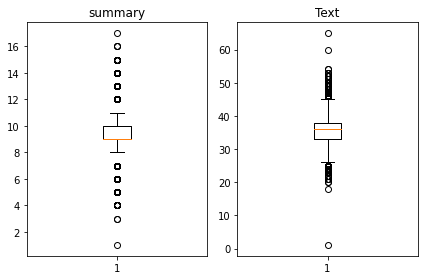

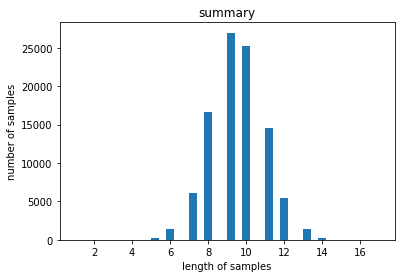

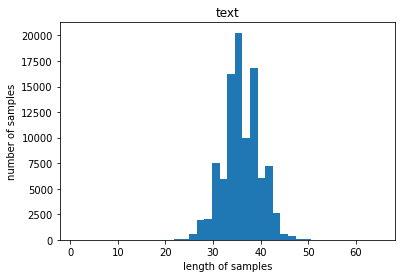

In [ ]:
import matplotlib.pyplot as plt

# 길이 분포 출력
text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_text_len=40
max_summary_len=10

def threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
threshold_len(max_text_len, data['text'])
threshold_len(max_summary_len, data['summary'])

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.8886291805977582
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.7791384233900062


In [ ]:
#지정된 max_len보다 큰 데이터 제거
data = data[data['text'].apply(lambda x: len(x.split()) <= max_text_len)]
data = data[data['summary'].apply(lambda x: len(x.split()) <= max_summary_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 68363


#시작 토큰과 종료 토큰 추가

In [ ]:
 # 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다
data['summary'] = data['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
data.head(3)

,summary,text
2,sostok new zealand end rohit sharma-led india ...,new zealand defeated india wickets fourth odi ...
3,sostok aegon life iterm insurance plan helps c...,aegon life iterm insurance plan customers enjo...
5,sostok rahat fateh ali khan denies getting not...,pakistani singer rahat fateh ali khan denied r...


# 데이터 분리

In [ ]:
#데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data['text'],data['summary'],test_size=0.2,random_state=0,shuffle=True)

#정수 인코딩 및 패딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_text_len=40
max_summary_len=10

x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train)) #원문(x_train)에 대한 인코딩

In [ ]:
threshold=4

cnt=0 #등장 빈도가 threshhold 이하의 단어 수
tot_cnt=len(x_tokenizer.word_index) # 단어의 수
freq=0 #등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
tot_freq=0 #훈련 데이터의 전체 단어 빈도수 총 합

for key,value in x_tokenizer.word_counts.items(): # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    tot_freq=tot_freq+value
    if(value<threshold):
        cnt=cnt+1
        freq=freq+value
    
print('단어 집합(vocabulary)의 크기 :',tot_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(tot_cnt - cnt))
print("단어 집합에서 희귀 단어의 비율:", (cnt / tot_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (freq / tot_freq)*100)

단어 집합(vocabulary)의 크기 : 64414
등장 빈도가 3번 이하인 희귀 단어의 수: 37739
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26675
단어 집합에서 희귀 단어의 비율: 58.58819511286366
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.8615740070161553


In [ ]:
#등장 빈도가 threshold 미만인 경우 배제
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_train))

# 텍스트 시퀀스를 정수 시퀀스로 변환
x_train_seq = x_tokenizer.texts_to_sequences(x_train) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train)) #레이블에 해당하는 요약 데이터에 대한 인코딩

In [ ]:
threshold=6

cnt=0 #등장 빈도가 threshhold 이하의 단어 수
tot_cnt=len(y_tokenizer.word_index) # 단어의 수
freq=0 #등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
tot_freq=0 #훈련 데이터의 전체 단어 빈도수 총 합

for key,value in y_tokenizer.word_counts.items(): # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    tot_freq=tot_freq+value
    if(value<threshold):
        cnt=cnt+1
        freq=freq+value
    
print('단어 집합(vocabulary)의 크기 :',tot_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(tot_cnt - cnt))
print("단어 집합에서 희귀 단어의 비율:", (cnt / tot_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (freq / tot_freq)*100)

단어 집합(vocabulary)의 크기 : 28752
등장 빈도가 5번 이하인 희귀 단어의 수: 19672
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9080
단어 집합에서 희귀 단어의 비율: 68.41958820255982
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.072331653612223


In [ ]:
#등장 빈도가 threshold 미만인 경우 배제
y_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
y_tokenizer.fit_on_texts(list(y_train))

#텍스트 시퀀스를 정수 시퀀스로 변환
y_train_seq    =   y_tokenizer.texts_to_sequences(y_train) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

In [ ]:
#최대 길이에 맞춰 패딩
x_train    =   pad_sequences(x_train_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#vocabulary의 크기 확인
x_voc   =  x_tokenizer.num_words + 1
print("Size of vocabulary in X = {}".format(x_voc))

y_train    =   pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#vocabulary의 크기 확인
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in X = 26676
Size of vocabulary in Y = 9081


In [ ]:
#패딩 결과 확인
print(x_train[:3])
print(y_train[:3])

[[   42   136   551     8  4279   459  3079   679    82  2699    14  4600
    292  3451  2851    14     7   292  4790   679    13    46    21     2
     31   393   293   209  3004  3451   679  2380    18     8     0     0
      0     0     0     0]
 [  205    20  1173  3678  4236  3160  6499  6202 19609    30   254 23574
    187   465   294   387 17066  5332   504  3548  3161  3788   374    33
      9   105   254    49    15  2289  3080  1679  1817   465    10    25
    486     0     0     0]
 [ 4155   897   402   163    79  1452  1258   185   245 18242    18   897
    991  2290 18242    17    35  2396   883  4970   105  1628  2396    35
   9023  1771  2329   154  2643  2329  2080  3060   165     0     0     0
      0     0     0     0]]
[[   1  382  187 3751 4056 1607 3134 2795 1118    2]
 [   1   42 6093 4846    4  233   66 2946 4847    2]
 [   1 2564  733  302   96  135   41  206    2    0]]


#빈 샘플 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(y_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(y_val) if len(sentence) == 1]

#등장빈도에 따른 배제의 결과 생길 수 있는 비어있는 샘플 확인
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0


In [ ]:
#최종 데이터 수
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_val))
print('테스트 레이블의 개수 :',len(y_val))

훈련 데이터의 개수 : 54690
훈련 레이블의 개수 : 54690
테스트 데이터의 개수 : 13673
테스트 레이블의 개수 : 13673


#모델 설계 및 트레이닝
seq2seq + attention

In [ ]:
import urllib.request
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Gitub에 공개된 attention.py 사용(바다나우 어텐션)

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [ ]:
embedding_dim = 200
hidden_size = 300

# 인코더
encoder_inputs = Input(shape=(max_text_len,))

# 인코더의 임베딩 층
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

어텐션 메커니즘을 이용해 디코더의 출력층 설계

In [ ]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(y_voc, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model.save("summarization.h5") #학습 모델 저장

from google.colab import files
files.download("summarization.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 새로운 모델 객체를 만듭니다


# 이전에 저장한 가중치를 로드합니다
model.load_weights("/content/drive/MyDrive/ml_project/summarization.h5")


In [ ]:
src_index_to_word = x_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = y_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = y_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(max_text_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostok']) and i!=tar_word_to_index['eostok']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [ ]:
for i in range(0, 100):
    print("원문 : ",seq2text(x_train[i]))
    print("실제 요약문 :",seq2summary(y_train[i]))
    print("예측 요약문 :",decode_sequence(x_train[i].reshape(1, max_text_len)))
    print("\n")

원문 :  congress led rajasthan government promoted total 120 officers including 51 indian administrative service ias 41 indian police service ips officers first day new year earlier december 25 many 68 ias officers transferred state government 
실제 요약문 : rajasthan government promotes 51 ias 41 ips officers 
예측 요약문 :  rajasthan govt promotes 51 ias 41 ips officers


원문 :  centre reportedly granted environmental clearance industrial hub costing ã¢ââ¹91 crore karnataka chamarajanagar district project come area 460 acres expected generate employment opportunities 17 000 people notably karnataka chief minister siddaramaiah laid foundation stone project two years ago 
실제 요약문 : crore industrial hub in karnataka gets green clearance 
예측 요약문 :  centre extends crore for karnataka and complex


원문 :  mexican journalist shot death sunday leaving restaurant wife son veracruz state journalist groups consider veracruz one country dangerous areas reporters notably mexico dangerous country latin america 